# Tutorial on `pysealevelrise`, the Sea Level Rise Python Package

## Purpose
This simple tutorial is meant to cover 90% of cases where simple Sea Level Rise (SLR) figures are needed for engineering applications.

## Assumptions
This tutorial assumes that you were able to install the package, either directly from git or from the cloned repo on your local disk. The best way to install the package is into a virtual environment.

## Settings

In [1]:
import sealevelrise
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload

## Display All Available Locations
Here we want to display all locations where SLR information is available.

## Load a Set of SLRProjections
Let's assume we'd like to work with a project site located next to North Spit, CA. Let's load all available information for that location using the following command:

In [2]:
sealevelrise.SLRProjections.show_all_builtin_scenarios(format='dataframe')

,Key,Location(s) covered,Issuer
0,nj-dep-2021,New Jersey,New Jersey Department of Environmental Protection
1,cocat-2018-9414290,"San Francisco, CA",California OPC 2018
2,cocat-2018-9410660,"Los Angeles, CA",California OPC 2018
3,cocat-2018-9419750,"Crescent City, CA",California OPC 2018
4,cocat-2018-9410170,"San Diego, CA",California OPC 2018
5,cocat-2018-9418767,"North Spit, CA",California OPC 2018
6,NPCC3-new-york-2019,New York City,"The New York Academy of Sciences, New York Cit..."


In [3]:
sealevelrise.BuiltinProjections(key='NPCC3-new-york-2019')

Sea level rise Projections for New York City issued by The New York Academy of Sciences, New York City Panel on Climate Change 2019 Report Executive Summary; there are 5 Scenario(s) available.

In [4]:
nyc=sealevelrise.SLRProjections.from_builtin('NPCC3-new-york-2019')

<AxesSubplot:title={'center':'SLR for New York City'}, ylabel='SLR [ft]'>

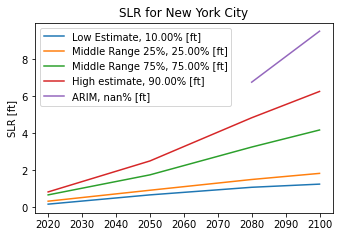

In [5]:
nyc.plot()

The projections can easily be loaded and displayed in a familiar format:

It is possible that depending on project requirements or client preferences, specific units be desired. For that, the `.convert` class method can be invoked:

In [7]:
nj.convert(to_units="mm")

,"Low end, 5.00% [mm]","Lower end of the likely range, 17.00% [mm]","Center of the likely range, 50.00% [mm]","Upper end of the likely range, 83.00% [mm]","High end, 95.00% [mm]"
Year (baseline: 2000),,,,,
2000.0,NaN,NaN,0.000000,NaN,NaN
2010.0,NaN,NaN,60.957025,NaN,NaN
2020.0,30.478513,91.435538,152.392563,213.349589,274.306614
2030.0,91.435538,152.392563,243.828101,335.263639,396.220664
2040.0,152.392563,213.349589,335.263639,457.177690,579.091740
2050.0,213.349589,274.306614,426.699177,640.048766,792.441329
2060.0,243.828101,365.742152,548.613228,761.962816,944.833892
2070.0,304.785126,426.699177,670.527278,944.833892,1158.183481
2080.0,335.263639,487.656202,792.441329,1158.183481,1462.968607


In [16]:
temp = nj.scenarios[1].data.y

In [ ]:
np

<AxesSubplot:title={'center':'SLR for North Spit, CA'}, ylabel='SLR [ft]'>

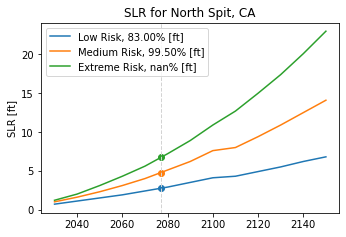

In [3]:
ns.plot(horizon_year=2027 + 50)

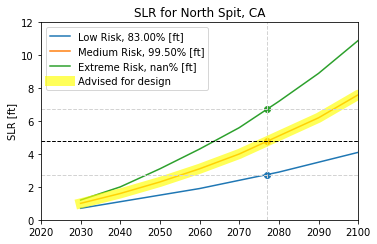

In [34]:
horiz_year = 2027 + 50
# Display a base figure using the builtin method
ax = ns.plot(horizon_year=horiz_year)

# Highlight the specific Scenario item retained for design
ax.plot(ns[1].data.x, ns[1].data.y, c='yellow', label='Advised for design', lw=10, alpha=.65)

# Use the builtin class method to estimate SLR by the horizon year
ax.axhline(y=ns[0].by_horizon_year(horizon_year=horiz_year), c='lightgrey', ls='--', lw=1)
ax.axhline(y=ns[1].by_horizon_year(horizon_year=horiz_year), c='k', ls='--', lw=1)
ax.axhline(y=ns[2].by_horizon_year(horizon_year=horiz_year), c='lightgrey', ls='--', lw=1)

# Adjust the time and projection axis ranges
ax.set_xlim([2020, 2100])
ax.set_ylim([0, 12])

# Update the legend
plt.legend()
plt.tight_layout()

plt.savefig('projections.png')

In [36]:
ns.by_horizon_year(horizon_year=horiz_year, merge=False)

Low Risk        2.75
Medium Risk     4.77
Extreme Risk    6.72
Name: SLR at North Spit, CA by 2077 [ft], dtype: float64

In [7]:
# Grab the value by a certain date, and display as a probability distribution;
# useful when discussing probabilities with SLR projections.
# Rarely useful in practice!
dist_val = dict()
for scenario_ in ns.scenarios:
    dist_val[scenario_.short_name] = {   
        "value" : scenario_.by_horizon_year(horizon_year=horiz_year),
        "units" : scenario_.units,
        "CDF" : scenario_.probability
    }
df_dist = (
    pd.DataFrame.from_dict(data=dist_val, orient='index')
    .rename_axis(f'by {horiz_year}', axis=1)
)

In [9]:
hslr = sealevelrise.HistoricalSLR(station_ID=ns.station_ID, units='ft')

In [29]:
pd.DataFrame.from_dict(
    data=hsealevelrise._data,
    orient='index'
)

,0
stationId,9418767
stationName,"North Spit, CA"
affil,US
latitude,40.7663
longitude,-124.2172
trend,4.91
trendError,0.43
units,mm/yr
startDate,09/15/1977
endDate,12/15/2020
